# Exploration of Street Trees Under Municipal Jurisdiction in Oakland, CA

### I will be using a dataset taken from the city of Oakland, CA containing location and type data on every street tree the city oversees



#### First I will be importing the following Libraries: pandas, geopandas (for data exploration), contextily, osmnx (for mapping), and folium (for interactive mapping)

#### I will then be importing the dataset titled 'Trees Sidewalk Raw' sourced from the city of Oakland's opendata portal

In [2]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import osmnx as ox

import folium

In [3]:
oakt = gpd.read_file('https://opendata.arcgis.com/datasets/385456a220174ef1854738b4029df3fd_0.geojson')

## Data Exploration

#### First  I'll look at my data, clean up the columns/rows, and get a good look at what I'm working with

In [4]:
oakt.shape

(42661, 51)

In [5]:
type(oakt)

geopandas.geodataframe.GeoDataFrame

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
oakt.sample()

OBJECTID SEGMENTID PLANAREAID COUNCILDIS SURVEYOR COLLDATE  COLLTIME  \
29198     29199       958          2          3        6   3/2/06  15:16:53   

       LOCATION TREE WELL WELLWIDTH WELLLENGTH PAREAWIDTH LOWWELL HVW STUMP  \
29198  22.66312   -1    0         0          0          6    None   0     0   

      BRKNHNGLMB OPENCAVITY STRCTRCNT LOWLIMB TRNKLEAN          SPECIES  \
29198          0          0         0    None     None  Maytenus boaria   

      WATERMET FIREHYD DRIVEWAY LIGHTPOLE STRTCRNR TRUNKDIAM GRATE STAKEGUARD  \
29198        0       0        0         0        0     Small  None         -1   

                   TREE_KEY  ADDRNUM   STNAME IS_PROBLEM DEAD DEADWOOD  \
29198  TREE_3/2/06_15:16:53      729  31ST ST      False    0     None   

      ARB_CMNT     ARB_TIME ARB_DATE SYM_CODE LANDUSE  TRUNKDIA_NUM  \
29198     None  12:39:01 PM  5/18/06        1     Res             1   

      FACILITYID LEGACYID WARRANTYDATE INSTALLDATE CONDITION CONDITIONDATE  \
29198      51164     None         None        None      None          None   

      INSTALL_ID DESIGNATION                     geometry  
29198       None        None  POINT (-122.27315 37.82090)

In [8]:
oakt.head()

OBJECTID SEGMENTID PLANAREAID COUNCILDIS SURVEYOR COLLDATE  COLLTIME  \
0         1      1273          6          6       11   7/5/06  10:18:28   
1         2      1273          6          6       11   7/5/06  10:18:09   
2         3       939          6          6       11  7/12/06  15:03:59   
3         4       482          6          6        8   7/7/06  11:57:32   
4         5       381          6          6        8   7/5/06  13:55:58   

    LOCATION TREE WELL WELLWIDTH WELLLENGTH PAREAWIDTH LOWWELL HVW STUMP  \
0  171.00000   -1   -1         3          5          0    None   0     0   
1  144.00000   -1   -1         3          5          0    None   0     0   
2   56.41644   -1    0         0          0          4    None   0     0   
3   44.00000   -1   -1         3          3          0     Low   0     0   
4  132.00000   -1    0         0          0        4.5    None   0     0   

  BRKNHNGLMB OPENCAVITY STRCTRCNT   LOWLIMB TRNKLEAN               SPECIES  \
0          0          0         0      None     None        Pyrus kawakami   
1          0          0         0      None     None  Pyrus calleryana cvs   
2          0          0         0      None     None                 Shrub   
3          0          0         0  Sidewalk     None              Malus sp   
4          0          0         0    Street     None   Platanus acerifolia   

  WATERMET FIREHYD DRIVEWAY LIGHTPOLE STRTCRNR TRUNKDIAM GRATE STAKEGUARD  \
0        0       0        0         0        0    Medium  None          0   
1        0       0        0         0        0    Medium  None          0   
2        0       0        0         0        0     Small  None          0   
3        0       0        0         0        0    Medium  None          0   
4        0       0        0         0        0     Large  None          0   

                TREE_KEY  ADDRNUM        STNAME IS_PROBLEM DEAD DEADWOOD  \
0   TREE_7/5/06_10:18:28     5301  WENTWORTH AV      False    0     None   
1    TREE_7/5/06_10:18:9     5301  WENTWORTH AV      False    0     None   
2  TREE_7/12/06_15:03:59     1506       57TH AV      False    0     None   
3   TREE_7/7/06_11:57:32     5200  EAST 12TH ST      False    0     None   
4   TREE_7/5/06_13:55:58     5490  EL CAMILE AV      False    0     None   

  ARB_CMNT     ARB_TIME  ARB_DATE SYM_CODE LANDUSE  TRUNKDIA_NUM FACILITYID  \
0     None  11:18:01 AM  10/18/06        1     Res             2      71157   
1     None  11:18:08 AM  10/18/06        1     Res             2      71158   
2     None  12:15:50 PM  10/18/06        1     Res             1      71165   
3     None  10:33:22 AM  10/18/06        1     Com             2      71172   
4     None  10:07:02 AM  10/23/06        1     Res             3      71180   

  LEGACYID WARRANTYDATE INSTALLDATE CONDITION CONDITIONDATE INSTALL_ID  \
0     None         None        None      None          None       None   
1     None         None        None      None          None       None   
2     None         None        None      None          None       None   
3     None         None        None      None          None       None   
4     None         None        None      None          None       None   

  DESIGNATION                     geometry  
0        None  POINT (-122.20335 37.77072)  
1        None  POINT (-122.20340 37.77066)  
2        None  POINT (-122.20014 37.76709)  
3        None  POINT (-122.20896 37.76671)  
4        None  POINT (-122.19416 37.77440)

In [9]:
oakt.tail()

OBJECTID SEGMENTID PLANAREAID COUNCILDIS SURVEYOR COLLDATE  COLLTIME  \
42656     42657         0          5          4       11  8/30/06  12:00:00   
42657     42658         0          5          4       11  8/30/06  12:00:00   
42658     42659         0          5          4       11  8/30/06  12:00:00   
42659     42660         0          5          4       11  8/30/06  12:00:00   
42660     42661         0          5          5       11  8/30/06  12:00:00   

       LOCATION TREE WELL WELLWIDTH WELLLENGTH PAREAWIDTH LOWWELL HVW STUMP  \
42656       0.0   -1    0         0          0          4    None   0     0   
42657       0.0   -1    0         0          0          4    None   0     0   
42658       0.0   -1    0         0          0          4    None   0     0   
42659       0.0   -1    0         0          0          4    None   0     0   
42660       0.0   -1    0         0          0          4    None   0     0   

      BRKNHNGLMB OPENCAVITY STRCTRCNT LOWLIMB TRNKLEAN               SPECIES  \
42656          0          0         0    None     None             Prunus sp   
42657          0          0         0    None     None                  Dead   
42658          0          0         0    None     None             Cercis sp   
42659          0          0         0    None     None  Magnolia grandiflora   
42660          0          0         0    None     None  Lagerstroemia indica   

      WATERMET FIREHYD DRIVEWAY LIGHTPOLE STRTCRNR TRUNKDIAM GRATE STAKEGUARD  \
42656        0       0        0         0        0    Medium  None          0   
42657        0       0        0         0        0    Medium  None          0   
42658        0       0        0         0        0    Medium  None          0   
42659        0       0        0         0        0    Medium  None          0   
42660        0       0        0         0        0    Medium  None          0   

                   TREE_KEY  ADDRNUM STNAME IS_PROBLEM DEAD DEADWOOD ARB_CMNT  \
42656  TREE_4/7/06_23:14:23        0   None      False    0     None     None   
42657  TREE_4/7/06_23:14:23        0   None      False   -1     High     None   
42658  TREE_4/7/06_23:14:23        0   None      False    0     None     None   
42659  TREE_4/7/06_23:14:23        0   None      False    0     None     None   
42660  TREE_4/7/06_23:14:23        0   None      False    0     None     None   

          ARB_TIME ARB_DATE SYM_CODE LANDUSE  TRUNKDIA_NUM FACILITYID  \
42656   3:03:22 PM  7/26/06        1     Res             2      85516   
42657   3:05:08 PM  7/26/06        1     Res             2      85517   
42658  10:35:32 AM  7/27/06        1     Res             2      85519   
42659  12:35:39 PM  7/27/06        1     Res             2      85525   
42660  10:07:10 AM  7/28/06        1     Res             2      85527   

      LEGACYID WARRANTYDATE INSTALLDATE CONDITION CONDITIONDATE INSTALL_ID  \
42656     None         None        None      None          None       None   
42657     None         None        None      None          None       None   
42658     None         None        None      None          None       None   
42659     None         None        None      None          None       None   
42660     None         None        None      None          None       None   

      DESIGNATION                     geometry  
42656        None  POINT (-122.20005 37.78579)  
42657        None  POINT (-122.20027 37.78599)  
42658        None  POINT (-122.20801 37.79141)  
42659        None  POINT (-122.20886 37.78415)  
42660        None  POINT (-122.22056 37.78465)

## Because I am concerned only with tree Species for this project, I'm going to see how many species we have in Oakland and try to pick a few lists out of this larger one

In [10]:
oakt.SPECIES.value_counts()

Tree well only                     4053
Platanus acerifolia                3788
Liquidambar styraciflua            3312
Pyrus calleryana cvs               2683
Prunus cerasifera/blireiana        2048
Lagerstroemia indica               1953
Pyrus kawakami                     1427
Magnolia grandiflora               1375
Fraxinus o. `Raywood'              1327
Pistacia chinensis                 1150
Unknown                            1123
Acer sp                             971
Prunus sp                           882
Fraxinus sp                         824
Other                               763
Lophostemon confertus               632
Ginkgo biloba                       576
Celtis sp                           567
Shrub                               565
Crataegus phaenopyrum               549
Cinnamomum camphora                 522
Quercus sp                          479
Dead                                452
Podocarpus gracilior                425
Cercis sp                           421


### As a tester, I will map the trees marked as "dead". This dataset lists all 'dead' trees under the SPECIES column, but oddly has a separate column to signify whether each tree is alive or dead. I'm curious if they contain the same trees.


#### First I will define a list of only 'dead' trees, then swap the value name so my map legend will hopefully make some sense

In [11]:
columns_trimmed = ['OBJECTID',
                       'LOCATION',
                       'SPECIES',
                       'DEAD',
                       'geometry']

oakt_deadmap = oakt[columns_trimmed]

In [12]:
list=['-1']
list=oakt.DEAD.isin(list)
oakt_deadmap=oakt[list]

oakt_deadmap["DEAD"].replace({"-1":"Dead Tree"}, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [13]:
oakt_deadmap.sample()

OBJECTID SEGMENTID PLANAREAID COUNCILDIS SURVEYOR COLLDATE  COLLTIME  \
12291     12292      1034          3          1        8   6/8/06  14:29:57   

       LOCATION TREE WELL WELLWIDTH WELLLENGTH PAREAWIDTH LOWWELL HVW STUMP  \
12291      80.0   -1   -1         2          3          0     Low   0     0   

      BRKNHNGLMB OPENCAVITY STRCTRCNT LOWLIMB TRNKLEAN SPECIES WATERMET  \
12291          0          0         0    None     None    Dead        0   

      FIREHYD DRIVEWAY LIGHTPOLE STRTCRNR TRUNKDIAM GRATE STAKEGUARD  \
12291       0        0         0        0    Medium  None          0   

                   TREE_KEY  ADDRNUM        STNAME IS_PROBLEM       DEAD  \
12291  TREE_6/8/06_14:29:57     5100  TELEGRAPH AV      False  Dead Tree   

      DEADWOOD ARB_CMNT    ARB_TIME ARB_DATE SYM_CODE LANDUSE  TRUNKDIA_NUM  \
12291     High     None  6:20:30 PM   8/1/06        1     Com             2   

      FACILITYID LEGACYID WARRANTYDATE INSTALLDATE CONDITION CONDITIONDATE  \
12291      59358     None         None        None      None          None   

      INSTALL_ID DESIGNATION                     geometry  
12291       None        None  POINT (-122.26189 37.83732)

<AxesSubplot:>

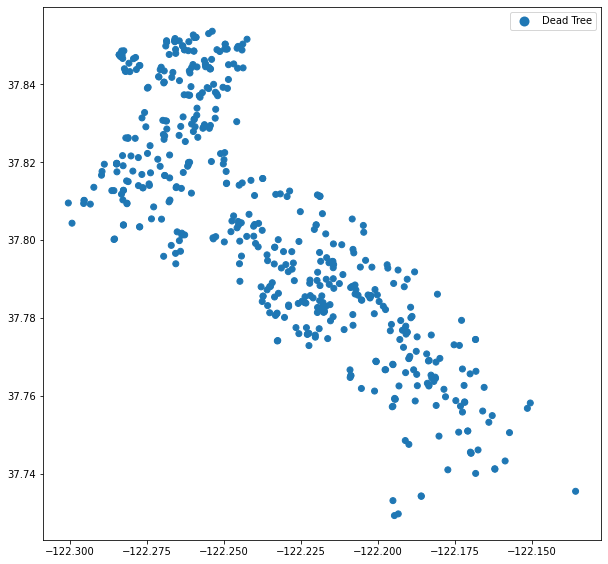

In [14]:
oakt_deadmap.plot(figsize=(10,10),
         column='DEAD',
         cmap='tab20',
         legend=True)

## Excited to see that it worked. Now onto some other lists. First I will replace the value names so my map legends will display the common names of each tree, making it easier on my map readers to identify what I'm displaying. Then I will convert each set to the Mercator projection to avoid distortion before I add basemaps.

#### <u>Below I will create a list for:</u> 

#### - Dead trees under the 'DEAD' category <b><u>and</u></b> 'SPECIES' category because I want to see if there are discrepencies between the data in each column

#### - Fruit trees because I find it interesting that Oakland has these in their public space and their presence makes me question about who they are accessible to and whether they are providing fruit to the public

#### - Maple species as a test to see how the list/renameing works and because the maple tree genus is easy to pick out from the larger list

#### - Coniferous species, as they retain their folliage throughout the winter months and this might 'shed some light' on which areas retain canopy-provided shade throughout the dormant seasons



In [15]:
list=['Acer sp', 'Acer palmatum','Acer negundo', 'Acer rubrum','Acer macrophyllum','Acer buergeranum','Acer saccharinum',]
list=oakt.SPECIES.isin(list)
oakt_maple_species=oakt[list]

oakt_maple_species["SPECIES"].replace({"Acer sp": "Common Maple", 
                                  "Acer palmatum": "Japanese Maple",
                                  "Acer negundo":"Boxelder Maple",
                                  "Acer rubrum":"Red Maple",
                                 "Acer macrophyllum":"Bigleaf Maple",
                                 "Acer buergeranum":"Trident Maple",
                                 "Acer saccharinum":"Silver Maple",}, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [16]:
list=['Dead']
list=oakt.SPECIES.isin(list)
oakt_dead_species=oakt[list]

In [17]:
list=['Cupressus sp', 'Cupressus sempervirens', 
      'Pinus sp','Pinus pinea', 'Pinus radiata', 'Pinus canariensis','Pinus thunbergiana', 
      'Juniperus sp',
      'Sequoia sempervirens',
      'Calocedrus decurrens', 'Cedrus deodara',   ]
list=oakt.SPECIES.isin(list)
oakt_conifers=oakt[list]

oakt_conifers["SPECIES"].replace({"Cupressus sp": "Common Cypress", 
                                  "Cupressus sempervirens": "Mediterranean Cypress",
                                  "Pinus sp":"Common Pine",
                                  "Pinus pinea":"Stone Pine",
                                 "Pinus radiata":"Monetery Pine",
                                 "Pinus canariensis":"Canary Island Pine",
                                 "Pinus thunbergiana":"Japanese Black Pine",
                                 "Juniperus sp":"Common Juniper",
                                 "Sequoia sempervirens":"Coastal Redwood",
                                 "Calocedrus decurrens":"Incense Cedar",
                                 "Cedrus deodara":"Deodar Cedar"}, inplace=True)

In [18]:
list=['Banana', 'Fig Tree', 'Guava', 'Apricot tree', 'Ficus carica', 'Fruit tree']
list=oakt.SPECIES.isin(list)
oakt_fruit=oakt[list]

oakt_fruit["SPECIES"].replace({"Banana" : "Banana Tree", 
                                  "Fig Tree" : "Fig Tree",
                                  "Guava" : "Guava Tree",
                                  "Apricot Tree" : "Apricot Tree",
                                 "Fruit Tree" : "Fruit Tree",
                                "Ficus carica" : "Fig Tree",
                              }, inplace=True)

<AxesSubplot:>

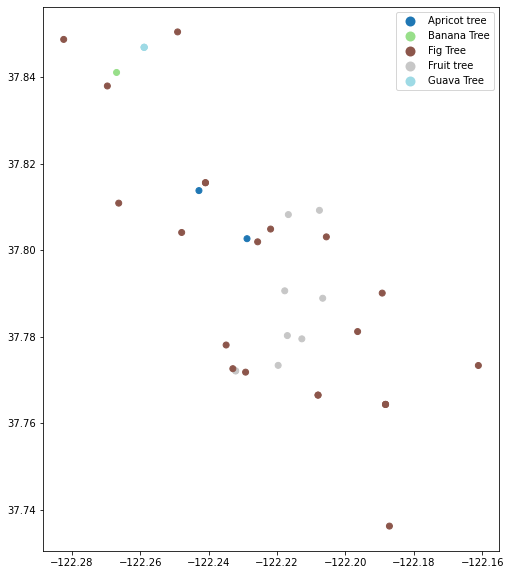

In [19]:
oakt_fruit.plot(figsize=(10,10),
         column='SPECIES',
         cmap='tab20',
               legend=True)

## Looking good so far. Next I will be doing projection conversion then moving on to adding basemaps, titles, legends, etc

In [20]:
oakt_fruit_mercator = oakt_fruit.to_crs(epsg=3857)

oakt_deadmap_mercator = oakt_deadmap.to_crs(epsg=3857)

oakt_dead_species_mercator = oakt_dead_species.to_crs(epsg=3857)

oakt_maple_species_mercator = oakt_maple_species.to_crs(epsg=3857)

oakt_conifers_mercator = oakt_conifers.to_crs(epsg=3857)

(-13615357.776870029,
 -13595189.601155275,
 4540389.949395995,
 4559646.684424193)

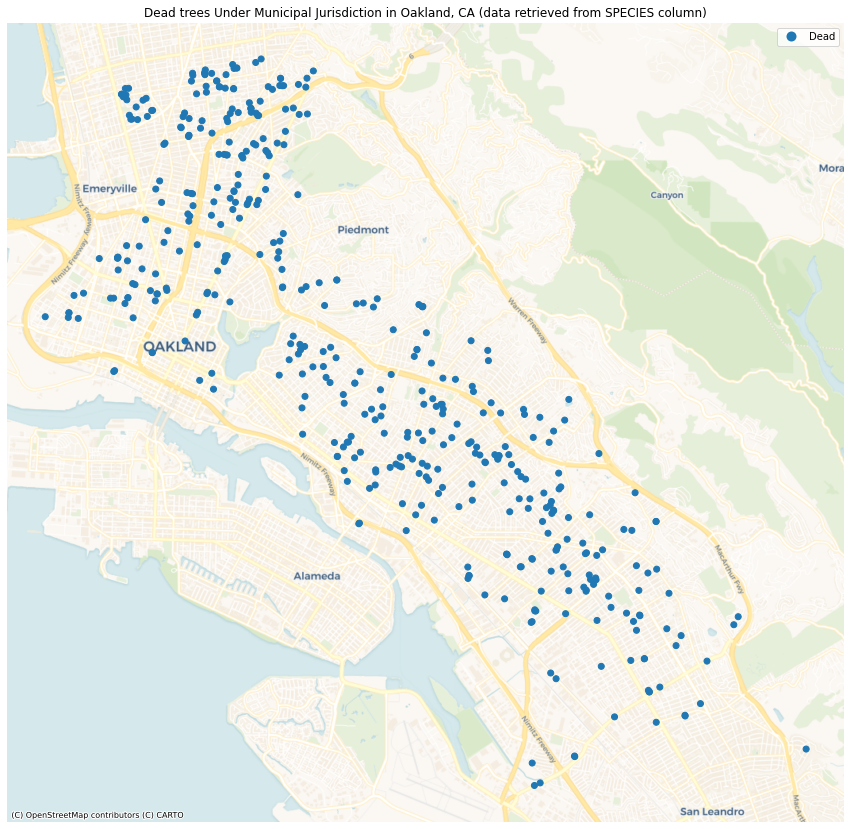

In [21]:
ax = oakt_dead_species_mercator.plot(column='SPECIES',cmap="tab20", figsize=(15, 15), legend=True)
ctx.add_basemap(ax, crs=oakt_dead_species_mercator.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

ax.set_title('Dead trees Under Municipal Jurisdiction in Oakland, CA (data retrieved from SPECIES column)')
ax.axis('off')

(-13615357.776870029,
 -13595189.601155275,
 4540389.949395995,
 4559646.684424193)

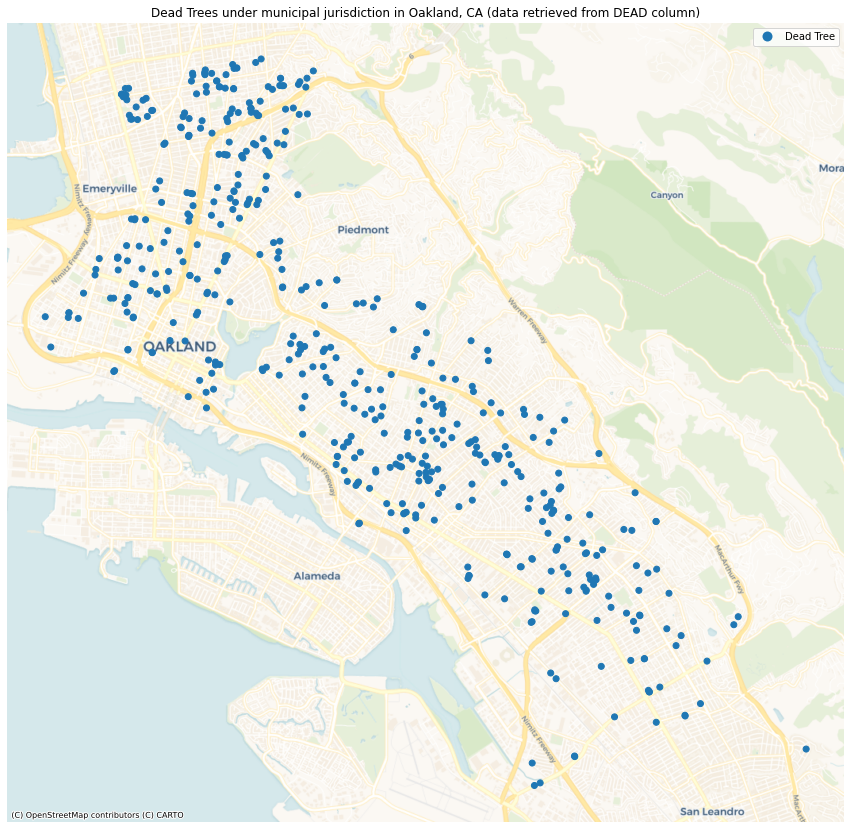

In [22]:
ax = oakt_deadmap_mercator.plot(column='DEAD', figsize=(15, 15), cmap="tab20", legend=True,)
ctx.add_basemap(ax, crs=oakt_deadmap_mercator.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

ax.set_title('Dead Trees under municipal jurisdiction in Oakland, CA (data retrieved from DEAD column)')
ax.axis('off')

## ^From a quick look it doesn't seem like there are any discrepencies between the dead trees in DEAD column and SPECIES column. 

## On to the other maps:

(-13613084.713287916,
 -13598242.428018367,
 4541430.753927154,
 4559118.371474976)

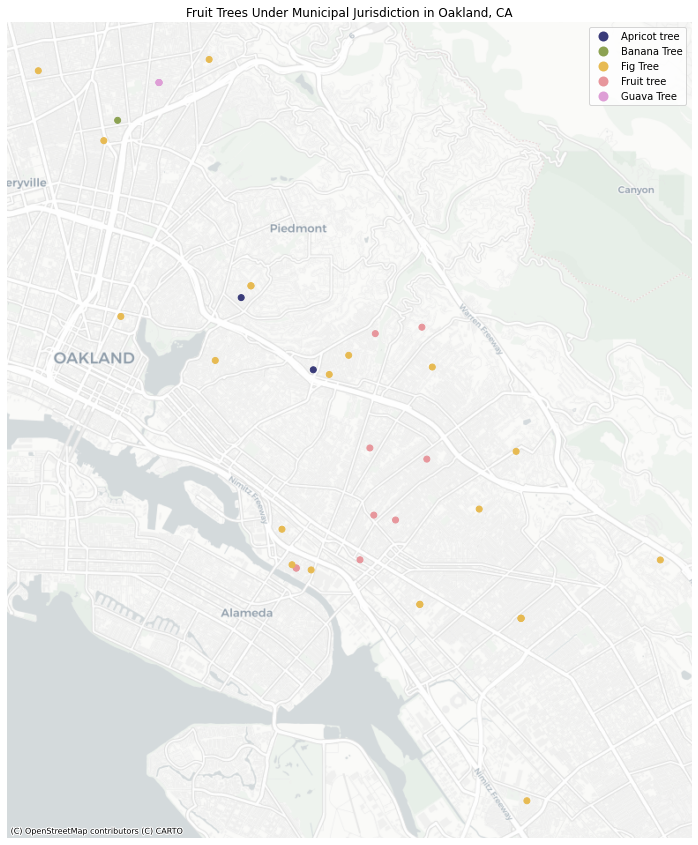

In [23]:
ax = oakt_fruit_mercator.plot(column='SPECIES',cmap="tab20b", figsize=(15, 15), legend=True)
ctx.add_basemap(ax, crs=oakt_fruit_mercator.crs.to_string(), source=ctx.providers.CartoDB.Positron)

ax.set_title('Fruit Trees Under Municipal Jurisdiction in Oakland, CA')
ax.axis('off')

(-13615524.59856178, -13595224.544737143, 4540519.06775298, 4560243.283530435)

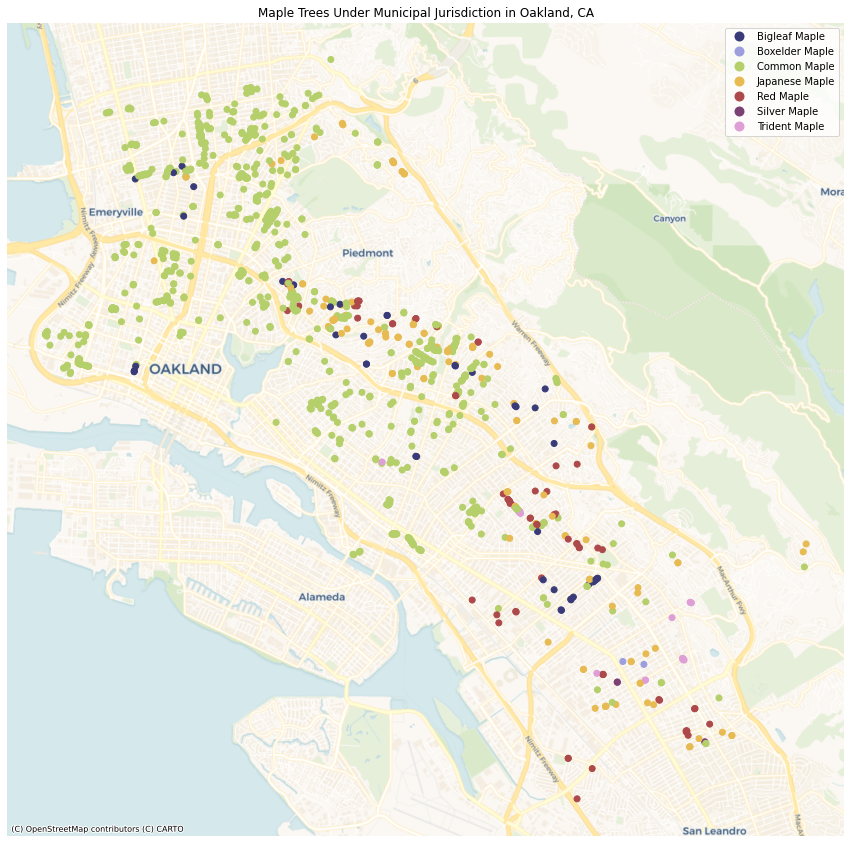

In [24]:
ax = oakt_maple_species_mercator.plot(column='SPECIES', figsize=(15, 15), cmap="tab20b", legend=True)
ctx.add_basemap(ax, crs=oakt_maple_species_mercator.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

ax.set_title('Maple Trees Under Municipal Jurisdiction in Oakland, CA')
ax.axis('off')

(-13615309.46443634, -13594820.121701268, 4540784.831160204, 4559368.73495584)

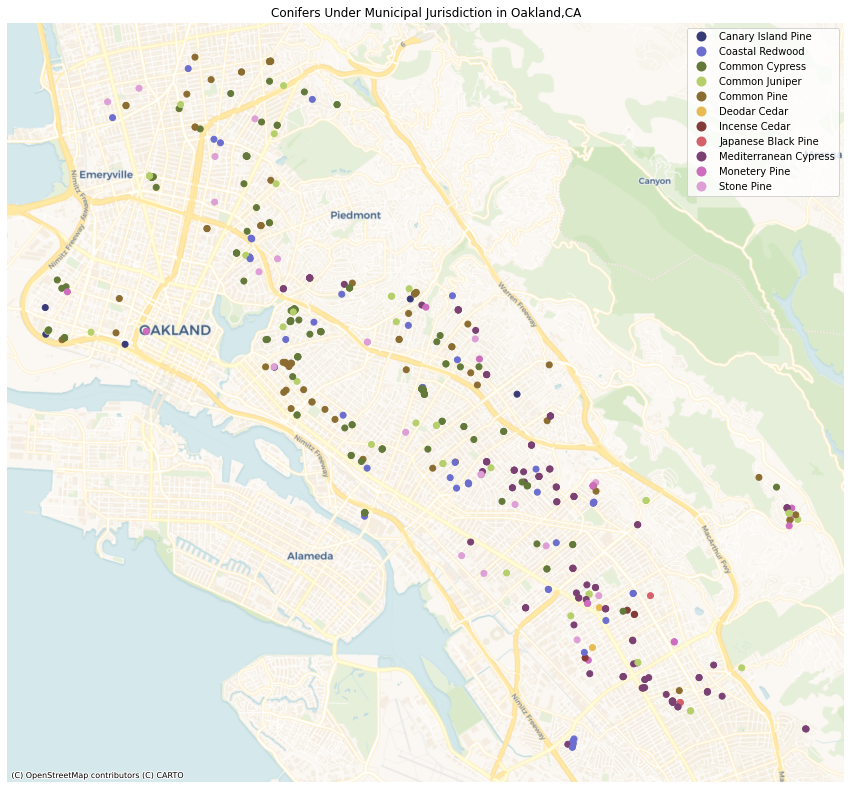

In [25]:
ax = oakt_conifers_mercator.plot(column='SPECIES', figsize=(15, 15), cmap="tab20b", legend=True)
ctx.add_basemap(ax, crs=oakt_conifers_mercator.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

ax.set_title('Conifers Under Municipal Jurisdiction in Oakland,CA')

ax.axis('off')

## Okay time to get an interactive map going...

### Let's see if I can get Oakland's Conifers onto a map here:

In [26]:
m = folium.Map()
m

In [27]:
latitude = 37.804363

longitude = -122.271111


### First I'll get a quick data check over with

In [28]:
oakt_conifers.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 477 entries, 41 to 42543
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       477 non-null    int64   
 1   SEGMENTID      477 non-null    object  
 2   PLANAREAID     477 non-null    object  
 3   COUNCILDIS     477 non-null    object  
 4   SURVEYOR       477 non-null    object  
 5   COLLDATE       477 non-null    object  
 6   COLLTIME       477 non-null    object  
 7   LOCATION       477 non-null    float64 
 8   TREE           477 non-null    object  
 9   WELL           477 non-null    object  
 10  WELLWIDTH      477 non-null    object  
 11  WELLLENGTH     477 non-null    object  
 12  PAREAWIDTH     477 non-null    object  
 13  LOWWELL        477 non-null    object  
 14  HVW            477 non-null    object  
 15  STUMP          477 non-null    object  
 16  BRKNHNGLMB     477 non-null    object  
 17  OPENCAVITY     477 non-n

### Next I will check that my list and names are still there and that the dataset looks the way I want it to.

In [29]:
oakt_conifers.SPECIES.value_counts()

Common Cypress           152
Mediterranean Cypress    109
Common Pine               69
Coastal Redwood           48
Common Juniper            46
Stone Pine                20
Monetery Pine             17
Canary Island Pine         6
Incense Cedar              4
Japanese Black Pine        4
Deodar Cedar               2
Name: SPECIES, dtype: int64

In [30]:
oakt_conifers.head()

OBJECTID SEGMENTID PLANAREAID COUNCILDIS SURVEYOR COLLDATE  COLLTIME  \
41         42      1348          6          6        8   7/7/06  14:16:30   
83         84       555          6          4       11  6/26/06  15:31:02   
132       133       602          6          6        7  6/27/06  14:15:31   
176       177       582          5          5        4  4/20/06  09:54:39   
180       181      1026          5          5       11  4/26/06  12:13:05   

      LOCATION TREE WELL WELLWIDTH WELLLENGTH PAREAWIDTH LOWWELL HVW STUMP  \
41   774.98126   -1    0         0          0          3    None   0     0   
83    39.00000   -1    0         0          0          4    None   0     0   
132   80.35884   -1    0         0          0          2    None   0     0   
176  416.00000   -1    0         0          0          3    None   0     0   
180  279.04537   -1    0         0          0          6    None   0     0   

    BRKNHNGLMB OPENCAVITY STRCTRCNT LOWLIMB TRNKLEAN                SPECIES  \
41           0          0         0    None     None  Mediterranean Cypress   
83           0          0         0    None     None         Common Juniper   
132          0          0         0    None     None  Mediterranean Cypress   
176          0          0         0    None     None            Common Pine   
180          0          0         0    None     None        Coastal Redwood   

    WATERMET FIREHYD DRIVEWAY LIGHTPOLE STRTCRNR TRUNKDIAM GRATE STAKEGUARD  \
41         0       0        0         0        0    Medium  None          0   
83         0       0        0         0        0     Large  None          0   
132        0       0        0         0        0     Small  None          0   
176        0       0        0         0        0     Small  None          0   
180        0       0        0         0        0  XX-large  None          0   

                  TREE_KEY  ADDRNUM        STNAME IS_PROBLEM DEAD DEADWOOD  \
41    TREE_7/7/06_14:16:30     1354       53RD AV      False    0     None   
83    TREE_6/26/06_15:31:2     4533  BROOKDALE AV      False    0     None   
132  TREE_6/27/06_14:15:31     4535    REDDING ST      False    0     None   
176  TREE_4/20/06_09:54:39     2011       38TH AV      False    0     None   
180   TREE_4/26/06_12:13:5     1434       28TH AV      False    0     None   

    ARB_CMNT     ARB_TIME  ARB_DATE SYM_CODE LANDUSE  TRUNKDIA_NUM FACILITYID  \
41      None  10:38:10 AM  10/18/06        1     Res             2      70997   
83      None  11:00:22 AM  10/24/06        1     Res             3      70598   
132     None   8:28:42 AM  10/20/06        1     Res             1      70280   
176     None   1:03:20 PM   7/27/06        1     Res             1      68085   
180     None  10:58:18 AM   7/13/06        1     Res             5      68117   

    LEGACYID WARRANTYDATE INSTALLDATE CONDITION CONDITIONDATE INSTALL_ID  \
41      None         None        None      None          None       None   
83      None         None        None      None          None       None   
132     None         None        None      None          None       None   
176     None         None        None      None          None       None   
180     None         None        None      None          None       None   

    DESIGNATION                     geometry  
41         None  POINT (-122.20649 37.76765)  
83         None  POINT (-122.20202 37.78056)  
132        None  POINT (-122.19312 37.78450)  
176        None  POINT (-122.21484 37.78049)  
180        None  POINT (-122.22925 37.78049)

In [31]:
desired_columns=['LOCATION','SPECIES','geometry']
oakt_conifers_trimmed=oakt_conifers[desired_columns].copy()

In [32]:
oakt_conifers_trimmed.head()

LOCATION                SPECIES                     geometry
41   774.98126  Mediterranean Cypress  POINT (-122.20649 37.76765)
83    39.00000         Common Juniper  POINT (-122.20202 37.78056)
132   80.35884  Mediterranean Cypress  POINT (-122.19312 37.78450)
176  416.00000            Common Pine  POINT (-122.21484 37.78049)
180  279.04537        Coastal Redwood  POINT (-122.22925 37.78049)

### I was getting errors because the geometry column wasn't allowing me to plot onto folium (I think) so first I will have to convert to separate lat/long values and go from there

In [33]:
oakt_conifers_trimmed['lon']=oakt_conifers_trimmed.geometry.x
oakt_conifers_trimmed['lat']=oakt_conifers_trimmed.geometry.y

In [34]:
m = folium.Map(location=[latitude,longitude])

In [35]:
for index, row in oakt_conifers_trimmed.iterrows():

    folium.Marker([row.lat, row.lon], popup=row.SPECIES, tooltip=row.SPECIES).add_to(m)
m

for index, row in oakt_conifers_trimmed.iterrows():
    print(row.SPECIES, row.lat, row.lon)

Mediterranean Cypress 37.7676518849616 -122.206493122434
Common Juniper 37.7805563107474 -122.202020767499
Mediterranean Cypress 37.7844995786349 -122.193118994641
Common Pine 37.7804862355713 -122.214836456955
Coastal Redwood 37.7804897288215 -122.229253272486
Coastal Redwood 37.7777657941497 -122.20694606162
Mediterranean Cypress 37.7770895666079 -122.197293519622
Common Cypress 37.7886504803588 -122.212731603284
Common Juniper 37.7879008154743 -122.21401964802
Common Cypress 37.7933443344749 -122.21666259645
Common Cypress 37.7944825348999 -122.217064101088
Common Pine 37.7820345711186 -122.230148794118
Common Pine 37.7919852186336 -122.241360631323
Common Cypress 37.8060611382604 -122.246092436431
Common Cypress 37.7897094162536 -122.244681329281
Common Cypress 37.8037715823119 -122.241843249083
Common Cypress 37.8042068645711 -122.239456633294
Common Cypress 37.8059451548923 -122.246178446292
Common Cypress 37.8060729734118 -122.246083659887
Common Cypress 37.8060469362552 -122.24

### Okay great so now I have this huge list and it looks like I've got my lat/long values for every tree. Hopefully this will all display on a map:

In [36]:
for index, row in oakt_conifers_trimmed.iterrows():
    folium.Marker([row.lat, row.lon], popup=row.SPECIES, tooltip=row.SPECIES).add_to(m)
m

## Looking Good so far.

## Below, I attempted to carry out a Spatial Autocorrelation but couldn't get past dropping the NaN values from the 'dead trees in census block' column.

### Most of this code is borrowed from Michael's notebook

#### I tried three or four different df.drop commands but I don't think I'm defining the column name correctly. No time to continue so will have to wait until next week.

In [37]:
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

oakincome=gpd.read_file('HouseholdIncome.geojson')
oakrace=gpd.read_file('HispanicLatinoOriginByRace.geojson')
oakeduc=gpd.read_file('EducationalAttainment.geojson')

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:>

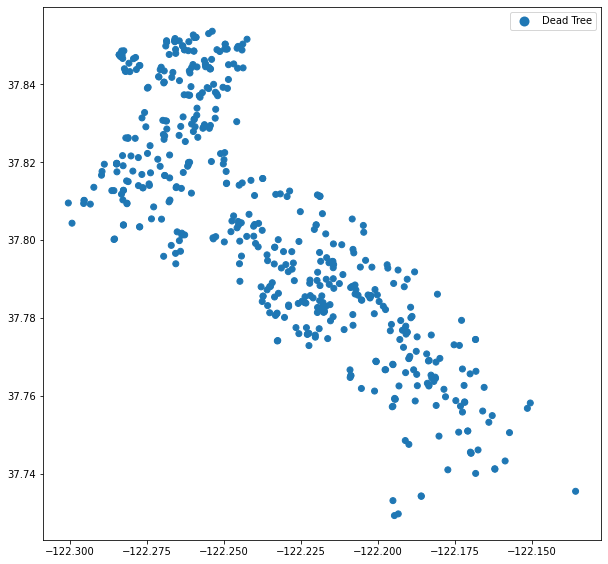

In [38]:
list=['-1']
list=oakt.DEAD.isin(list)
oakt_deadmap=oakt[list]

oakt_deadmap["DEAD"].replace({"-1":"Dead Tree"}, inplace=True)

oakt_deadmap.plot(figsize=(10,10),
         column='DEAD',
         cmap='tab20',
         legend=True)

In [39]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

oakrace.head()

geoid                        name  B03002001  \
0  15000US060014001001  Block Group 1, Alameda, CA     3120.0   
1  15000US060014002001  Block Group 1, Alameda, CA      990.0   
2  15000US060014002002  Block Group 2, Alameda, CA     1017.0   
3  15000US060014003001  Block Group 1, Alameda, CA     1134.0   
4  15000US060014003002  Block Group 2, Alameda, CA     1237.0   

   B03002001, Error  B03002002  B03002002, Error  B03002003  B03002003, Error  \
0             208.0     3002.0             191.0     2317.0             235.0   
1             138.0      894.0             129.0      761.0             129.0   
2             123.0      939.0             129.0      714.0             116.0   
3             238.0     1059.0             241.0      735.0             215.0   
4             263.0     1139.0             255.0     1008.0             248.0   

   B03002004  B03002004, Error  B03002005  B03002005, Error  B03002006  \
0      107.0              68.0        0.0              12.0      391.0   
1       13.0              13.0        4.0               7.0       41.0   
2       39.0              46.0        0.0              12.0      130.0   
3        0.0              12.0        0.0              12.0      274.0   
4       18.0              27.0        0.0              12.0      113.0   

   B03002006, Error  B03002007  B03002007, Error  B03002008  B03002008, Error  \
0             112.0        0.0              12.0        0.0              12.0   
1              25.0        0.0              12.0        0.0              12.0   
2              64.0        0.0              12.0        0.0              12.0   
3             152.0        0.0              12.0        0.0              12.0   
4              70.0        0.0              12.0        0.0              12.0   

   B03002009  B03002009, Error  B03002010  B03002010, Error  B03002011  \
0      187.0             126.0        0.0              12.0      187.0   
1       75.0              48.0        0.0              12.0       75.0   
2       56.0              46.0        0.0              12.0       56.0   
3       50.0              63.0        0.0              12.0       50.0   
4        0.0              12.0        0.0              12.0        0.0   

   B03002011, Error  B03002012  B03002012, Error  B03002013  B03002013, Error  \
0             126.0      118.0              61.0       77.0              50.0   
1              48.0       96.0              64.0       68.0              55.0   
2              46.0       78.0              50.0       34.0              32.0   
3              63.0       75.0              77.0       75.0              77.0   
4              12.0       98.0              74.0       61.0              46.0   

   B03002014  B03002014, Error  B03002015  B03002015, Error  B03002016  \
0        0.0              12.0        0.0              12.0        7.0   
1        0.0              12.0        0.0              12.0        0.0   
2        0.0              12.0        0.0              12.0        0.0   
3        0.0              12.0        0.0              12.0        0.0   
4        0.0              12.0        0.0              12.0        0.0   

   B03002016, Error  B03002017  B03002017, Error  B03002018  B03002018, Error  \
0              10.0        0.0              12.0       34.0              33.0   
1              12.0        0.0              12.0        5.0               7.0   
2              12.0        0.0              12.0       12.0              14.0   
3              12.0        0.0              12.0        0.0              12.0   
4              12.0        0.0              12.0       37.0              60.0   

   B03002019  B03002019, Error  B03002020  B03002020, Error  B03002021  \
0        0.0              12.0        0.0              12.0        0.0   
1       23.0              25.0        0.0              12.0       23.0   
2       32.0              34.0       14.0              25.0       18.0   
3        0.0              12.0        0.0      

In [40]:
oakrace_columnstokeep=['geoid',
                       'name',
                       'B03002001',
                       'B03002002',
                       'B03002003',
                       'B03002004',
                       'B03002005',
                       'B03002006',
                       'B03002007',
                       'B03002008',
                       'B03002009',
                       'B03002012',
                       'geometry']
oakrace=oakrace[oakrace_columnstokeep]

oakrace=oakrace.drop([337])

oakrace.columns= ['geoid', 'name', 
                   'Total', 
                   'Not Hispanic or Latino', 
                   'White alone', 
                   'Black or African American alone', 
                   'American Indian and Alaska Native alone',
                   'Asian alone',
                   'Native Hawaiian and Other Pacific Islander alone',
                   'Some other race alone',
                   'Two or more races',
                   'Hispanic or Latino',
                   'geometry']

In [41]:
oakrace['Percent Non Hispanic'] = oakrace['Not Hispanic or Latino']/oakrace['Total']*100
oakrace['Percent White'] = oakrace['White alone']/oakrace['Total']*100
oakrace['Percent Black'] = oakrace['Black or African American alone']/oakrace['Total']*100
oakrace['Percent Native American'] = oakrace['American Indian and Alaska Native alone']/oakrace['Total']*100
oakrace['Percent Asian'] = oakrace['Asian alone']/oakrace['Total']*100
oakrace['Percent Hawaiian/PI'] = oakrace['Native Hawaiian and Other Pacific Islander alone']/oakrace['Total']*100
oakrace['Percent other race'] = oakrace['Some other race alone']/oakrace['Total']*100
oakrace['Percent two or more races'] = oakrace['Two or more races']/oakrace['Total']*100
oakrace['Percent Hispanic/Latino'] = oakrace['Hispanic or Latino']/oakrace['Total']*100

In [42]:
oakmerge2=gpd.sjoin(oakrace,oakt_deadmap)
oakt_race=oakmerge2.value_counts('geoid').reset_index(name='dead trees in census block')
oakt_race=oakrace.merge(oakt_race,how='left',on='geoid')

In [43]:
oakt_race.head()

geoid                        name   Total  \
0  15000US060014001001  Block Group 1, Alameda, CA  3120.0   
1  15000US060014002001  Block Group 1, Alameda, CA   990.0   
2  15000US060014002002  Block Group 2, Alameda, CA  1017.0   
3  15000US060014003001  Block Group 1, Alameda, CA  1134.0   
4  15000US060014003002  Block Group 2, Alameda, CA  1237.0   

   Not Hispanic or Latino  White alone  Black or African American alone  \
0                  3002.0       2317.0                            107.0   
1                   894.0        761.0                             13.0   
2                   939.0        714.0                             39.0   
3                  1059.0        735.0                              0.0   
4                  1139.0       1008.0                             18.0   

   American Indian and Alaska Native alone  Asian alone  \
0                                      0.0        391.0   
1                                      4.0         41.0   
2                                      0.0        130.0   
3                                      0.0        274.0   
4                                      0.0        113.0   

   Native Hawaiian and Other Pacific Islander alone  Some other race alone  \
0                                               0.0                    0.0   
1                                               0.0                    0.0   
2                                               0.0                    0.0   
3                                               0.0                    0.0   
4                                               0.0                    0.0   

   Two or more races  Hispanic or Latino  \
0              187.0               118.0   
1               75.0                96.0   
2               56.0                78.0   
3               50.0                75.0   
4                0.0                98.0   

                                            geometry  Percent Non Hispanic  \
0  MULTIPOLYGON (((-122.24692 37.88544, -122.2466...             96.217949   
1  MULTIPOLYGON (((-122.25508 37.84607, -122.2542...             90.303030   
2  MULTIPOLYGON (((-122.25792 37.84261, -122.2577...             92.330383   
3  MULTIPOLYGON (((-122.25186 37.84475, -122.2517...             93.386243   
4  MULTIPOLYGON (((-122.26230 37.83786, -122.2622...             92.077607   

   Percent White  Percent Black  Percent Native American  Percent Asian  \
0      74.262821       3.429487                  0.00000      12.532051   
1      76.868687       1.313131                  0.40404       4.141414   
2      70.206490       3.834808                  0.00000      12.782694   
3      64.814815       0.000000                  0.00000      24.162257   
4      81.487470       1.455133                  0.00000       9.135004   

   Percent Hawaiian/PI  Percent other race  Percent two or more races  \
0                  0.0                 0.0                   5.993590   
1                  0.0                 0.0                   7.575758   
2                  0.0                 0.0                   5.506391   
3                  0.0                 0.0                   4.409171   
4                  0.0                 0.0                   0.000000   

   Percent Hispanic/Latino  dead trees in census block  
0                 3.782051                         NaN  
1                 9.696970                        10.0  
2                 7.669617                         7.0  
3                 6.613757                         3.0  
4                 7.922393                        10.0

In [44]:
wq = lps.weights.KNN.from_dataframe(oakt_race,k=5)
wq.transform = 'r'
oakt_race['dead trees in census block lag'] = lps.weights.lag_spatial(wq, oakt_race['dead trees in census block'])

In [45]:
y = oakt_race['dead trees in census block']
moran = Moran(y, wq)
moran.I

nan

Exception: one or more input arrays have missing/NaN values

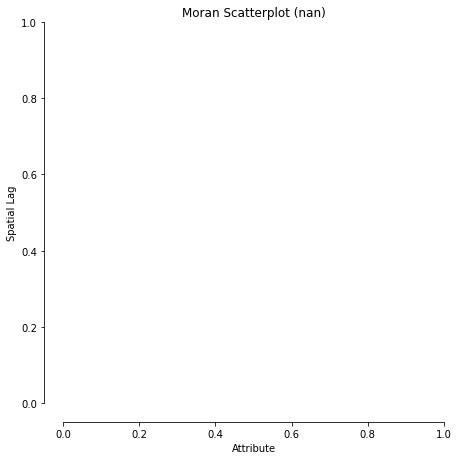

In [47]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

All work in this Notebook done by Elliott